<a href="https://colab.research.google.com/github/HiYulia/-CommunityDetection/blob/master/steven_time_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

下文为Steven在2022年全年的时间使用分析：

# 原数据上传与清洗

In [ ]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#upload data
!pip install -q xlrd

import pandas as pd
df1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/20230110165611.xls')
df2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/20230110165529.xlsx')

WARNING *** file size (1771050) not 512 + multiple of sector size (512)


In [ ]:
# merge and convert
df=pd.concat([df1, df2], axis=0) 
df['time_converetd_started'] = pd.to_datetime(df.开始时间)
df['time_converetd_end'] = pd.to_datetime(df.结束时间)
df['time period']=df['time_converetd_end']-df['time_converetd_started'] 

In [ ]:
df.head()

,ID,标题,参与者,开始时间,结束时间,创建者工号,创建者姓名,创建时间,地点,备注,更新时间,time_converetd_started,time_converetd_end,time period
0,63ad5768adfaf902e898e243,CBB相关内容沟通,"[牛心悦(Yulia Niu), 高鹏(Victor), 曾国烈, 惠康康(KK), 何凯锋...",2022-12-30 18:15:00,2022-12-30 19:30:00,80040860,黄芳芸(Jenney),2022-12-29 17:01:28,F2-218&Zoom,<p>1.器件决策小组与器件规划会的管理边界</p><p>2.规划外新开的定义澄清</p><...,2022-12-30 17:52:27,2022-12-30 18:15:00,2022-12-30 19:30:00,0 days 01:15:00
1,6389b52469e3fa01d9d96592,Salami项目出货评审会邀请（调整至12/30（周五）下午17:15）,"[李春辉, 李祖品(Ben Li), 侯晓路(Wall Hou), 马新(Ash), 王天兴...",2022-12-30 17:15:00,2022-12-30 18:15:00,80263938,黄德祥,2022-12-02 16:19:48,春笋会议地址：2712 长安工业园：F2生产楼-3楼301,"<div id=""copy-schedule""><br/><hr tabindex=""-1""...",2022-12-29 10:07:53,2022-12-30 17:15:00,2022-12-30 18:15:00,0 days 01:00:00
2,6392d85d5b5806039c4a98cf,技术竞争力会（双周例会）,"[万憬明(Jimmy), 古海雯(W9052060), 牛心悦(Yulia Niu), 黄珂...",2022-12-30 16:15:00,2022-12-30 17:10:00,80261790,曹磊,2022-12-09 14:40:29,春笋3508&长安生产楼2楼2-203(Kevin办公室旁),<p>议题1、供应链创新技术点对齐——庞钰驹 15min</p><p>随议题：吕杰、赵燕桥、...,2022-12-30 14:29:21,2022-12-30 16:15:00,2022-12-30 17:10:00,0 days 00:55:00
3,63aaa5cde3034903e47fbd78,凤凰座状态对齐,"[LONG WANG, HONG FAN, 张冀(Jeme), 胡涛(Hu Tao), 牛心...",2022-12-30 15:00:00,2022-12-30 16:00:00,80364809,Nathan,2022-12-27 15:59:09,zoom,"<span style=""color:#111112; background:#D7F5C9...",2022-12-28 08:42:25,2022-12-30 15:00:00,2022-12-30 16:00:00,0 days 01:00:00
4,63a971a6f3df5503c04f5c33,自研存储研讨,"[牛心悦(Yulia Niu), Logan(80366572), 张学勇(Paddy), ...",2022-12-30 14:00:00,2022-12-30 15:00:00,80277000,齐娟(Amber),2022-12-26 18:04:22,NaN,"<div id=""copy-schedule""><br><hr tabindex=""-1"" ...",2022-12-29 21:46:49,2022-12-30 14:00:00,2022-12-30 15:00:00,0 days 01:00:00


In [ ]:
#clear
df_new = df[['标题','创建者姓名','创建者工号','参与者','time_converetd_started','time period']].copy()
df_new = df_new.reset_index(level=0)
df_new = df_new.drop('index', axis=1)
df_new['time period']=df_new['time period'].astype('timedelta64[m]')

# 出差时间分析

In [ ]:
df_travel=df_new.loc[df_new['标题'].isin(['出差-Travel'])]
df_travel.head()

,标题,创建者姓名,创建者工号,参与者,time_converetd_started,time period
30,出差-Travel,管理员,TB000000,"[李春辉, 牛心悦(Yulia Niu), 祝志诚(Andy Zhu), 罗成(Roger)...",2022-12-23 06:00:00,3959.0
177,出差-Travel,管理员,TB000000,"[管理员, 王兆祥(Steven)]",2022-11-22 06:00:00,3900.0
258,出差-Travel,管理员,TB000000,"[管理员, 王兆祥(Steven)]",2022-11-08 06:00:00,3480.0
338,出差-Travel,管理员,TB000000,"[古海雯(W9052060), 廖新风(Rocky), 吴呈煜(Joy Wu), 宋涛(Lo...",2022-10-22 08:44:00,900.0
387,出差-Travel,管理员,TB000000,"[管理员, 王兆祥(Steven)]",2022-10-13 13:00:00,2099.0


In [ ]:
travel_counts=df_travel['time period'].count()
travel_total_time=int(df_travel['time period'].sum()/60)/24
travel_mean=round(int(df_travel['time period'].mean()/60)/24,2)

In [ ]:
print("2022全年共计出差",travel_counts,"次(但由于疫情影响，中间参杂临近取消情况，故实际更少),","共计",travel_total_time,"天,","平均每次",travel_mean,"天")

2022全年共计出差 47 次(但由于疫情影响，中间参杂临近取消情况，故实际更少), 共计 63.0 天, 平均每次 1.33 天


# 非出差时间分析

In [ ]:
df_notravel = df_new[(df_new['time period'] <720) & (df_new['标题']!='出差-Travel')]

In [ ]:
df_notravel.head()

,标题,创建者姓名,创建者工号,参与者,time_converetd_started,time period
0,CBB相关内容沟通,黄芳芸(Jenney),80040860,"[牛心悦(Yulia Niu), 高鹏(Victor), 曾国烈, 惠康康(KK), 何凯锋...",2022-12-30 18:15:00,75.0
1,Salami项目出货评审会邀请（调整至12/30（周五）下午17:15）,黄德祥,80263938,"[李春辉, 李祖品(Ben Li), 侯晓路(Wall Hou), 马新(Ash), 王天兴...",2022-12-30 17:15:00,60.0
2,技术竞争力会（双周例会）,曹磊,80261790,"[万憬明(Jimmy), 古海雯(W9052060), 牛心悦(Yulia Niu), 黄珂...",2022-12-30 16:15:00,55.0
3,凤凰座状态对齐,Nathan,80364809,"[LONG WANG, HONG FAN, 张冀(Jeme), 胡涛(Hu Tao), 牛心...",2022-12-30 15:00:00,60.0
4,自研存储研讨,齐娟(Amber),80277000,"[牛心悦(Yulia Niu), Logan(80366572), 张学勇(Paddy), ...",2022-12-30 14:00:00,60.0


In [ ]:
Q1=df_notravel[df_notravel.time_converetd_started.between('2022-1-1','2022-4-1')]
Q2=df_notravel[df_notravel.time_converetd_started.between('2022-4-1','2022-7-1')]
Q3=df_notravel[df_notravel.time_converetd_started.between('2022-7-1','2022-10-1')]
Q4=df_notravel[df_notravel.time_converetd_started.between('2022-10-1','2023-1-1')]
total_hour=int(df_notravel['time period'].sum()/60)

In [ ]:
print("2022全年共计总会议次数约为",df_notravel['time period'].count(),"次,","总会议时间约为（单位：小时）",total_hour,"即",total_hour/24,"天")
print("四个季度的会议次数分别是", Q1['time period'].count(), Q2['time period'].count(), Q3['time period'].count(), Q4['time period'].count())
print("四个季度的会议时间分别是(单位：小时）", int(Q1['time period'].sum()/60), int(Q2['time period'].sum()/60), int(Q3['time period'].sum()/60), int(Q4['time period'].sum()/60))

2022全年共计总会议次数约为 1617 次, 总会议时间约为（单位：小时） 2436 即 101.5 天
四个季度的会议次数分别是 388 406 418 405
四个季度的会议时间分别是(单位：小时） 536 640 671 588


In [ ]:
# plot


In [ ]:
df_notravel.loc[df_notravel['time period']==df_notravel['time period'].max()]

,标题,创建者姓名,创建者工号,参与者,time_converetd_started,time period
1291,OPPO日常管理工作坊,郑倩榆(Channy),80275761,"[刘玲(Cara), 黎诗琦(Suki), 尹文广(Garven Yin), 何凯锋(Ric...",2022-03-30 09:00:00,600.0


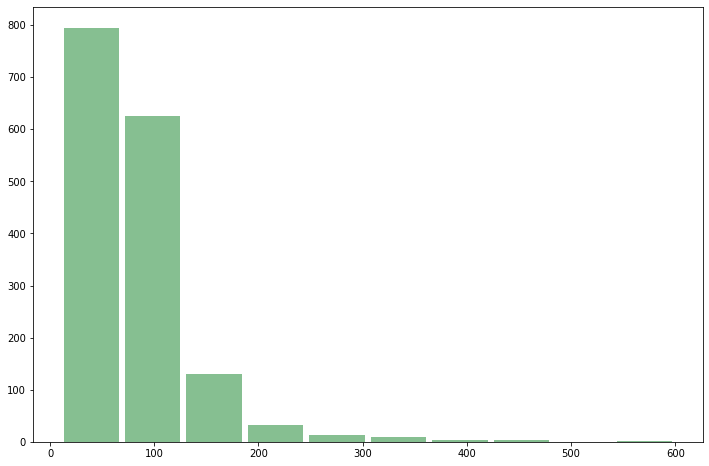

In [ ]:
#total会议时间直方图
df_notravel['time period'].hist(grid=False, figsize=(12,8), color='#86bf91', rwidth=0.9)

# 与外部系统会议

In [ ]:
df_product=df_notravel[df_notravel['参与者'].str.contains('刘作虎|段要辉')]
product_time=int(df_product['time period'].sum()/60)
product_counts=df_product['time period'].count()

In [ ]:
print("2022参加产品线相关会议",product_counts,"次,","总会议时间约为",product_time,"小时,占总时间",'{:.1%}'.format(product_time/total_hour))

2022参加产品线相关会议 337 次, 总会议时间约为 660 小时,占总时间 27.1%


# HR拉起会议时间

In [ ]:
#杨大韦、钟文嫡、黄宇雄、陈佳英、任秀慧，杨玉婷、王营、罗茜拉起会议
df_hr=df_notravel.loc[df_notravel['创建者工号'].isin(['80048520','80302265','80338446','80279818','80159512','80299215','80339985','80055663'])]
df_hr.head()
#HR最近拉起的5次会议如下

,标题,创建者姓名,创建者工号,参与者,time_converetd_started,time period
18,Steven对于硬工年终奖分配的访谈,杨大韦(DavidLouie),80048520,"[牛心悦(Yulia Niu), 王兆祥(Steven), 唐文婕(Fiona), 杨大韦(...",2022-12-27 11:15:00,30.0
29,硬件工程系统Q14报告解读与沟通,任秀慧(Jessica),80279818,"[牛心悦(Yulia Niu), 王兆祥(Steven), 任秀慧(Jessica), 王怡...",2022-12-23 09:00:00,45.0
101,硬工人力编制ZOOM讨论,杨大韦(DavidLouie),80048520,"[陈泽鸣(Allen), 赵恺(Kevin Zhao), 陈少敏(Elena), 贾玉虎(N...",2022-12-06 21:30:00,60.0
146,硬工11月人委会,钟文嫡(Mandyzhong),80302265,"[黎诗琦(Suki), 廖新风(Rocky), 黄宇雄(Orange), 杨大韦(David...",2022-11-29 10:30:00,120.0
149,干部沟通,钟文嫡(Mandyzhong),80302265,"[牛心悦(Yulia Niu), Dave(80372598), 钟文嫡(Mandyzhon...",2022-11-29 09:00:00,60.0


In [ ]:
hr_time=int(df_hr['time period'].sum()/60)
hr_counts=df_hr['time period'].count()

In [ ]:
print("2022 HR团队拉起会议次数约为",hr_counts,"次,","总会议时间约为",hr_time,"小时,占总时间",'{:.1%}'.format(hr_time/total_hour))

2022 HR团队拉起会议次数约为 44 次, 总会议时间约为 74 小时,占总时间 3.0%


# 运营拉起会议时间

In [ ]:
#曹磊、刘翔，曾国烈，雷鸣，段金豆拉起会议
df_operation=df_notravel.loc[df_notravel['创建者工号'].isin(['80261790','80245672','80237245','80256645','80092573'])]
df_operation.head()

,标题,创建者姓名,创建者工号,参与者,time_converetd_started,time period
2,技术竞争力会（双周例会）,曹磊,80261790,"[万憬明(Jimmy), 古海雯(W9052060), 牛心悦(Yulia Niu), 黄珂...",2022-12-30 16:15:00,55.0
6,器件规划会,曾国烈,80237245,"[罗小飞(Xiaofei), 安阳, 万憬明(Jimmy), 姜帆(Jiangfan), 刘...",2022-12-30 09:00:00,120.0
9,软硬协同沟通会,段金豆(Golden Bean),80092573,"[胡运林(Grant), 程杰(Rockie), 李春辉, 牛心悦(Yulia Niu), ...",2022-12-29 11:00:00,60.0
12,影像突破专项例会,刘翔(Carl),80245672,"[LEE DO HYUNG(80377786), Tom(80390633), 沈鹏云(Cl...",2022-12-28 14:10:00,240.0
23,软硬结合问题提前评审,段金豆(Golden Bean),80092573,"[赵恺(Kevin Zhao), 胡运林(Grant), 林俊杰(Leon Lin), 牛心...",2022-12-26 16:00:00,60.0


In [ ]:
operation_time=int(df_operation['time period'].sum()/60)
operation_counts=df_operation['time period'].count()

In [ ]:
print("2022年硬工运营团队拉起会议次数约为",operation_counts,"次,","总会议时间约为",operation_time,"小时,占总时间",'{:.1%}'.format(operation_time/total_hour))

2022年硬工运营团队拉起会议次数约为 145 次, 总会议时间约为 235 小时,占总时间 9.6%


# New Section